In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

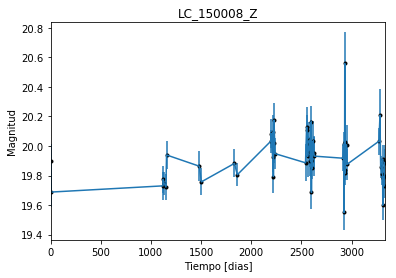

In [2]:
data = np.genfromtxt('LC_150008_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_150008_Z')
plt.savefig("LC_150008_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

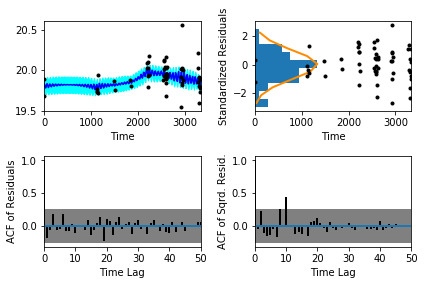

In [5]:
sample.assess_fit()

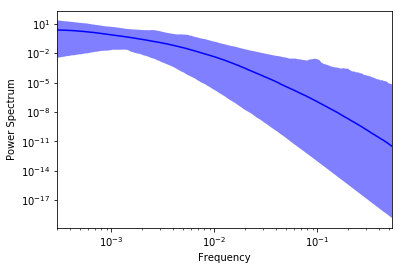

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

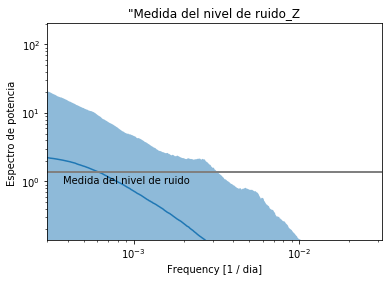

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_150008_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_150008_Z')

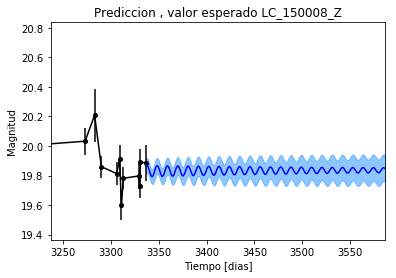

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_150008_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_150008_Z')

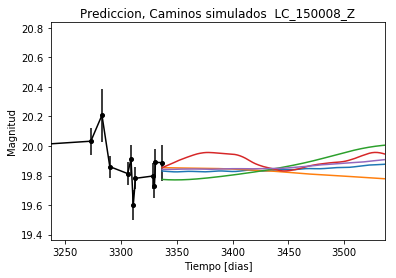

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_150008_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


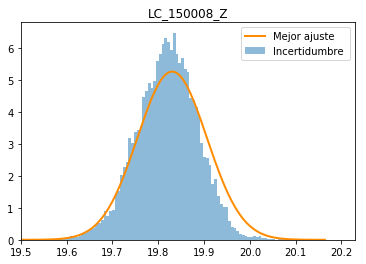

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_150008_Z')
plt.savefig("Mejor_ajuste_LC_150008_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_150008_Z')

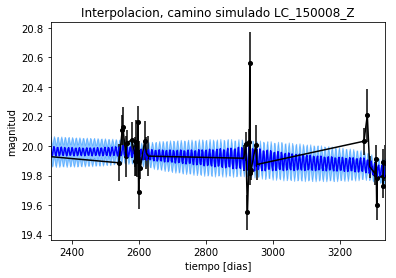

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_150008_Z')

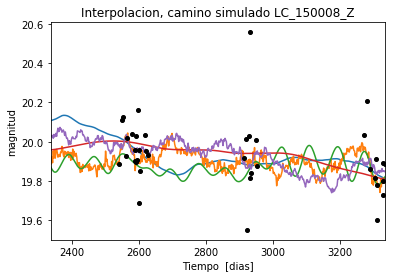

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 834.279754669
Median: 0.0110442348891
Standard deviation: 0.205970150676
68% credibility interval: [ 0.00093544  0.18795916]
95% credibility interval: [  3.44645544e-04   8.09573074e-01]
99% credibility interval: [  3.07313184e-04   1.03337632e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 770.751280451
Median: 0.00228352287613
Standard deviation: 0.0797762751827
68% credibility interval: [ 0.00051209  0.02980117]
95% credibility interval: [ 0.00031655  0.22416002]
99% credibility interval: [  3.03639999e-04   5.49052234e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1222.43723838
Median: 0.0228231403264
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1485.0274454
Median: 58.256014566
Standard deviation: 1.52164507808
68% credibility interval: [ 56.54243068  59.26369949]
95% credibility interval: [ 54.00075821  59.78654705]
99% credibility interval: [ 52.13593131  60.14424927]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 409.196281817
Median: 0.716236668466
Standard deviation: 2.29420642905
68% credibility interval: [ 0.05978458  4.03736487]
95% credibility interval: [ 0.01562518  7.86796569]
99% credibility interval: [  9.81810984e-03   1.08623058e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 694.570500147
Median: 0.456956251838
Standard deviation: 9.12443688377
68% credibility interval: [ 0.01447019  7.86798226]
95% credibility interval: [  7.3

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2766664.56556
Median: 1.20105613021e-24
Standard deviation: 1.30027373709e+51
68% credibility interval: [  1.44377830e-68   1.63260596e-02]
95% credibility interval: [  6.61852507e-93   1.23746946e+35]
99% credibility interval: [  7.41504356e-104   2.20403276e+043]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1277.14176662
Median: 19.8738406882
Standard deviation: 0.0498568945717
68% credibility interval: [ 19.82913392  19.91145063]
95% credibility interval: [ 19.76091888  19.95697485]
99% credibility interval: [ 19.68839692  20.00934854]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2375.12433973
Median: 0.0112652224229
Standard deviation: 0.236925241645
68% credibility interval: [ 0.         0.3034767]
95% credibility interval: [ 0.          0.87779729]
99% credibility interval: [ 0.          1.02893965]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2375.12433973
Median: 0.0112652224229
Standard deviation: 0.236925241645
68% credibility interval: [ 0.         0.3034767]
95% credibility interval: [ 0.          0.87779729]
99% credibility interval: [ 0.          1.02893965]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2003.85151662
Median: 0.0
Standard deviation: 0.0165787730629
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1485.0274454
Median: 58.256014566
Standard deviation: 1.52164507808
68% credibility interval: [ 56.54243068  59.26369949]
95% credibility interval: [ 54.00075821  59.78654705]
99% credibility interval: [ 52.13593131  60.14424927]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 4192.07417817
Median: 0.00724984931508
Standard deviation: 0.0125294538819
68% credibility interval: [ 0.00341188  0.01542692]
95% credibility interval: [ 0.00146488  0.03563678]
99% credibility interval: [ 0.00059643  0.06687968]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1366.95067817
Median: 1.24845742225
Standard deviation: 0.184731903915
68% credibility interval: [ 1.07875926  1.44492262]
95% credibility interval: [ 0.95008232  1.67683982]
99% credibility interval: [ 0.86999028  1.84763564]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 10010.8848165
Median: 0.000100896567116
Standard deviation: 0.287839427702
68% credibility interval: [  3.36354259e-07   6.35944919e-03]
95% credibility interval: [  1.17220395e-37   1.87497762e-01]
99% credibility interval: [  4.63128442e-50   7.51842092e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 834.279754669
Median: (-0.0693929743842-2.8518316344j)
Standard deviation: 1.97253268295
68% credibility interval: [-1.18098222-0.31122006j -0.00587753-0.01793285j]
95% credibility interval: [ -5.08669764e+00 -2.67719050e+00j  -2.16547182e-03 -1.32667514e-03j]
99% credibility interval: [ -6.49289490e+00+0.j          -1.93090568e-03-0.16965793j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 770.751280451
Median: (-0.0143477973839+0.0783725608652j)
Standard deviation: 1.57076898478
68% credibility interval: [-0.18724630+3.42195431j -0.00321753+0.j        ]
95% credibility interval: [-1.40843897+4.81805989j -0.00198893+0.j        ]
99% credibility interval: [ -3.44979693e+00+2.96926086j  -1.90782638e-03+0.j        ]
Pos